Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this dataset? Play around a bit and write up your findings and your process. Keep in mind that you may find a solution with more than three clusters that nevertheless better tracks the real, trinary outcome. For example, two of those clusters may map to a single flower type, while the other two map to the other types

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

51.7 ms ± 2.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


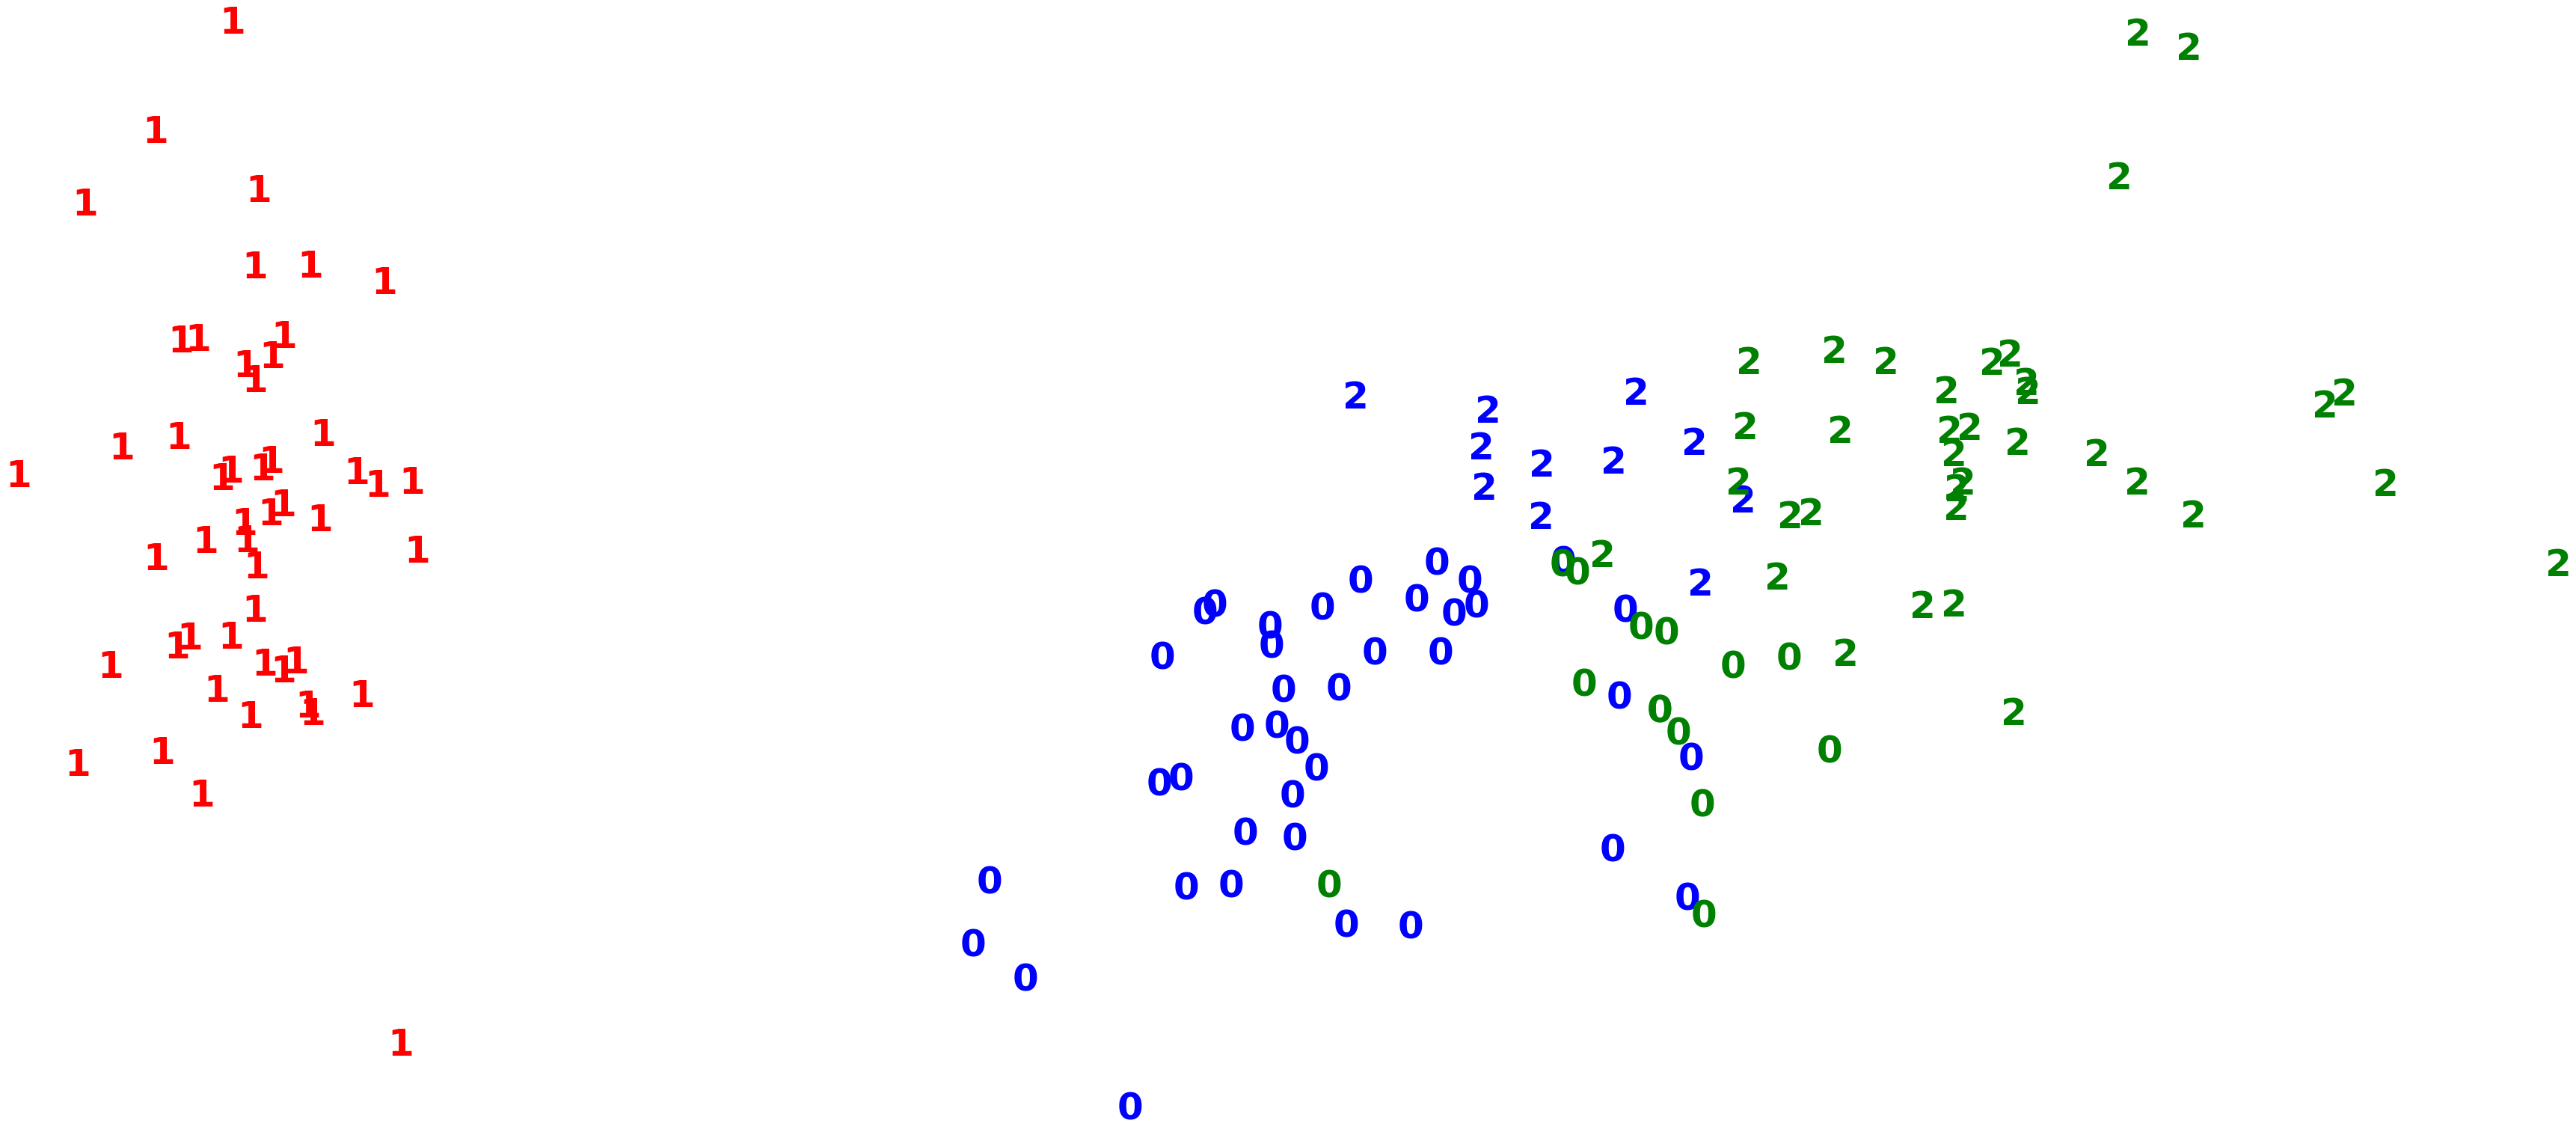

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

56 ms ± 4.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


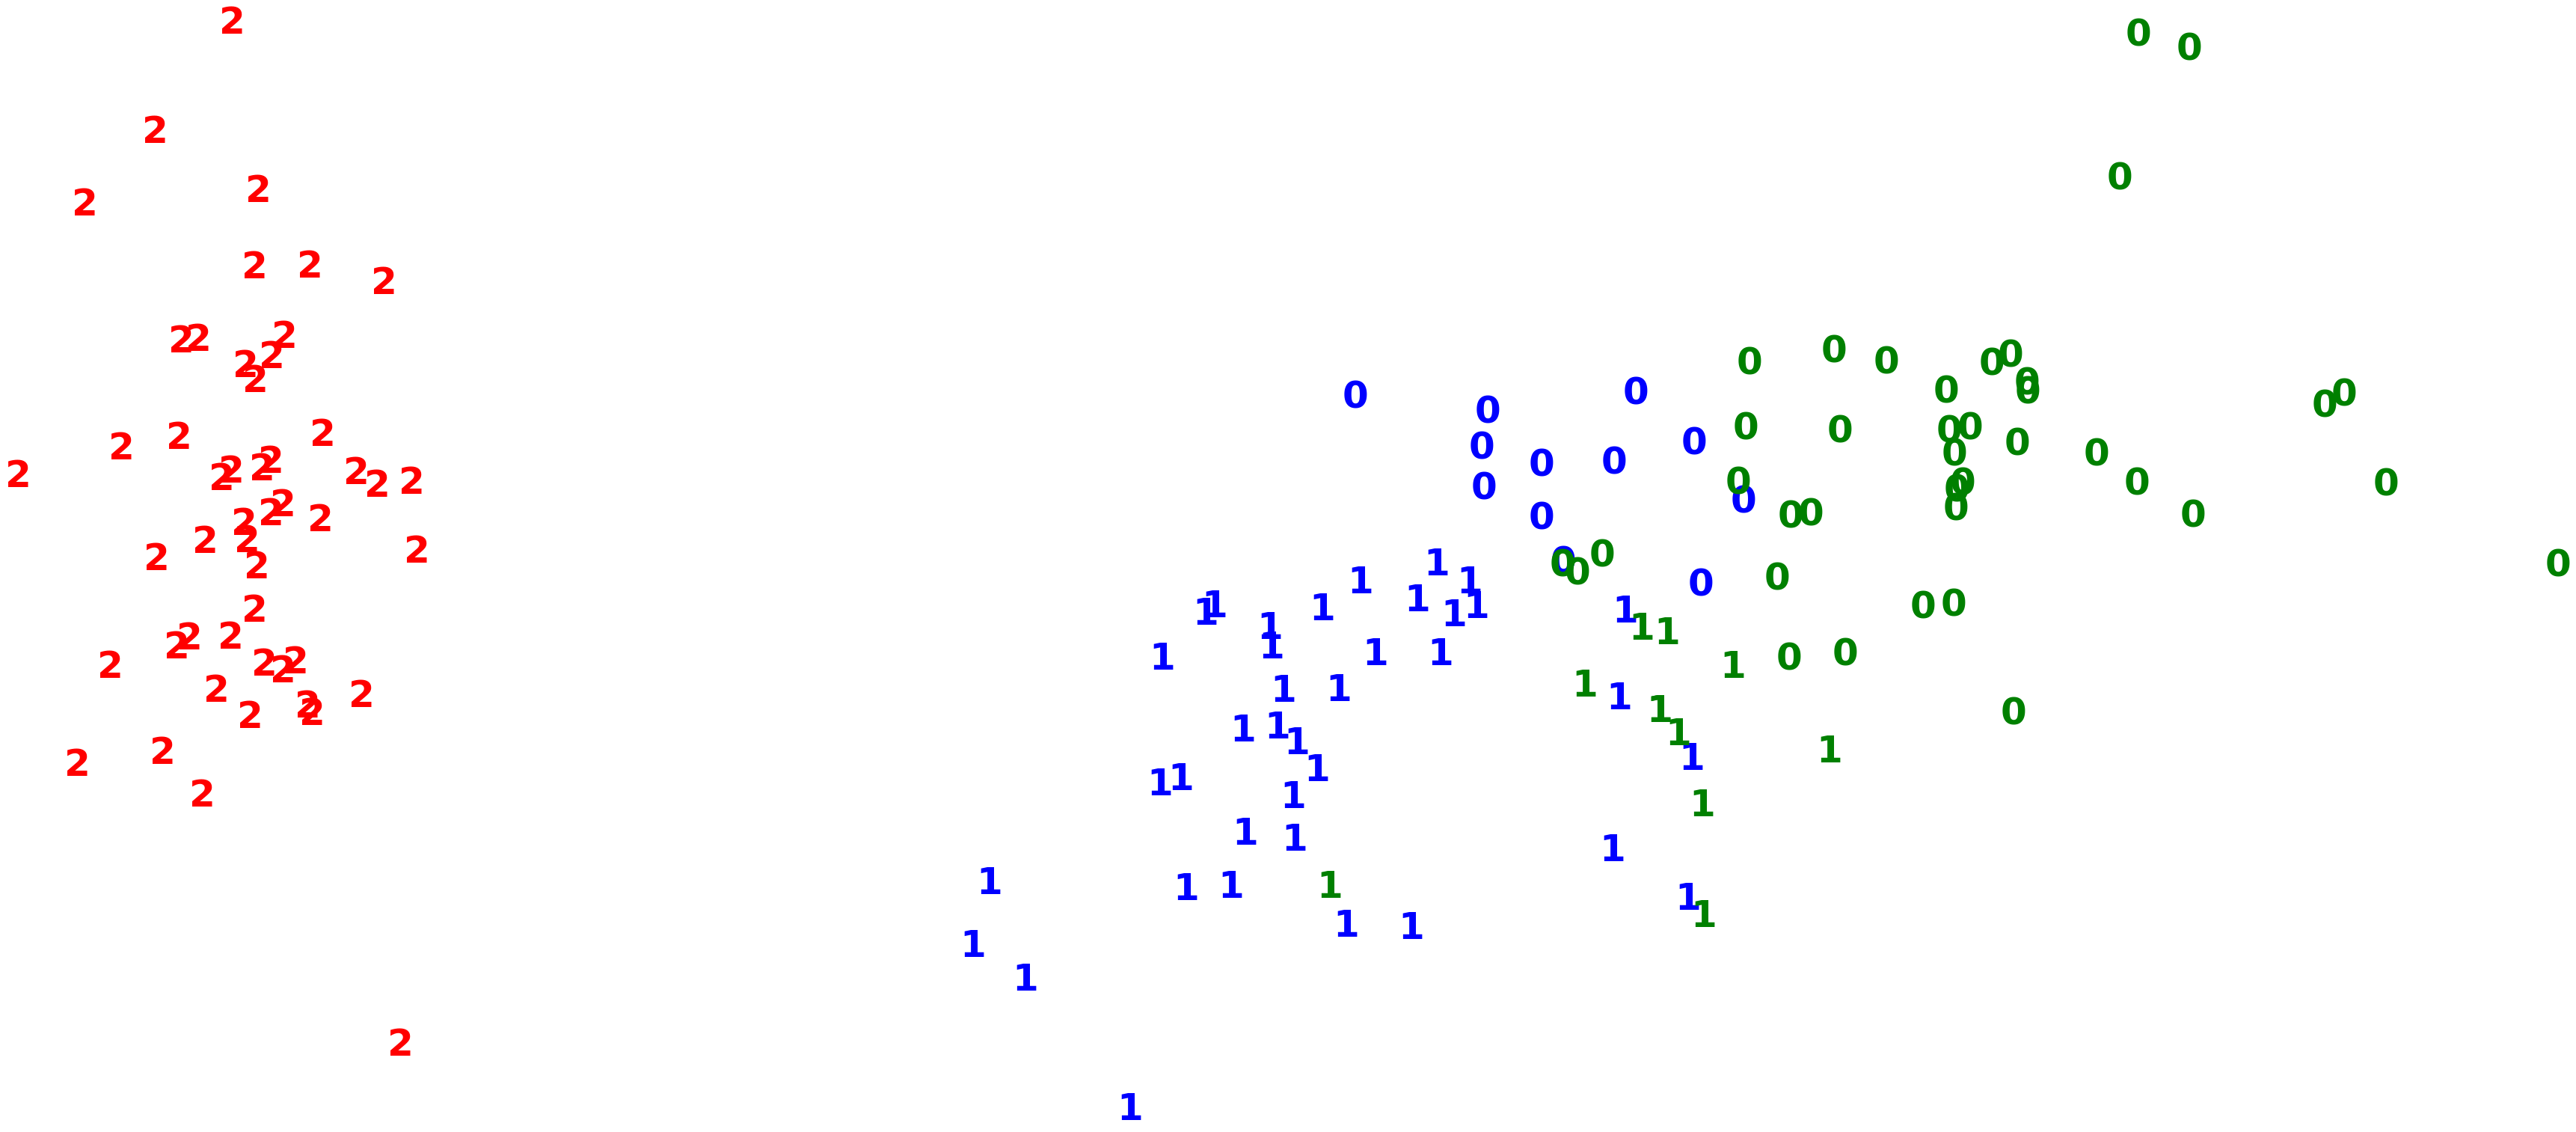

In [ ]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
text_x=np.mean([pca[i,0] for i in range(pca.shape[0])])
text_y=np.max([pca[i,1] for i in range(pca.shape[0])])

61.7 ms ± 4.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


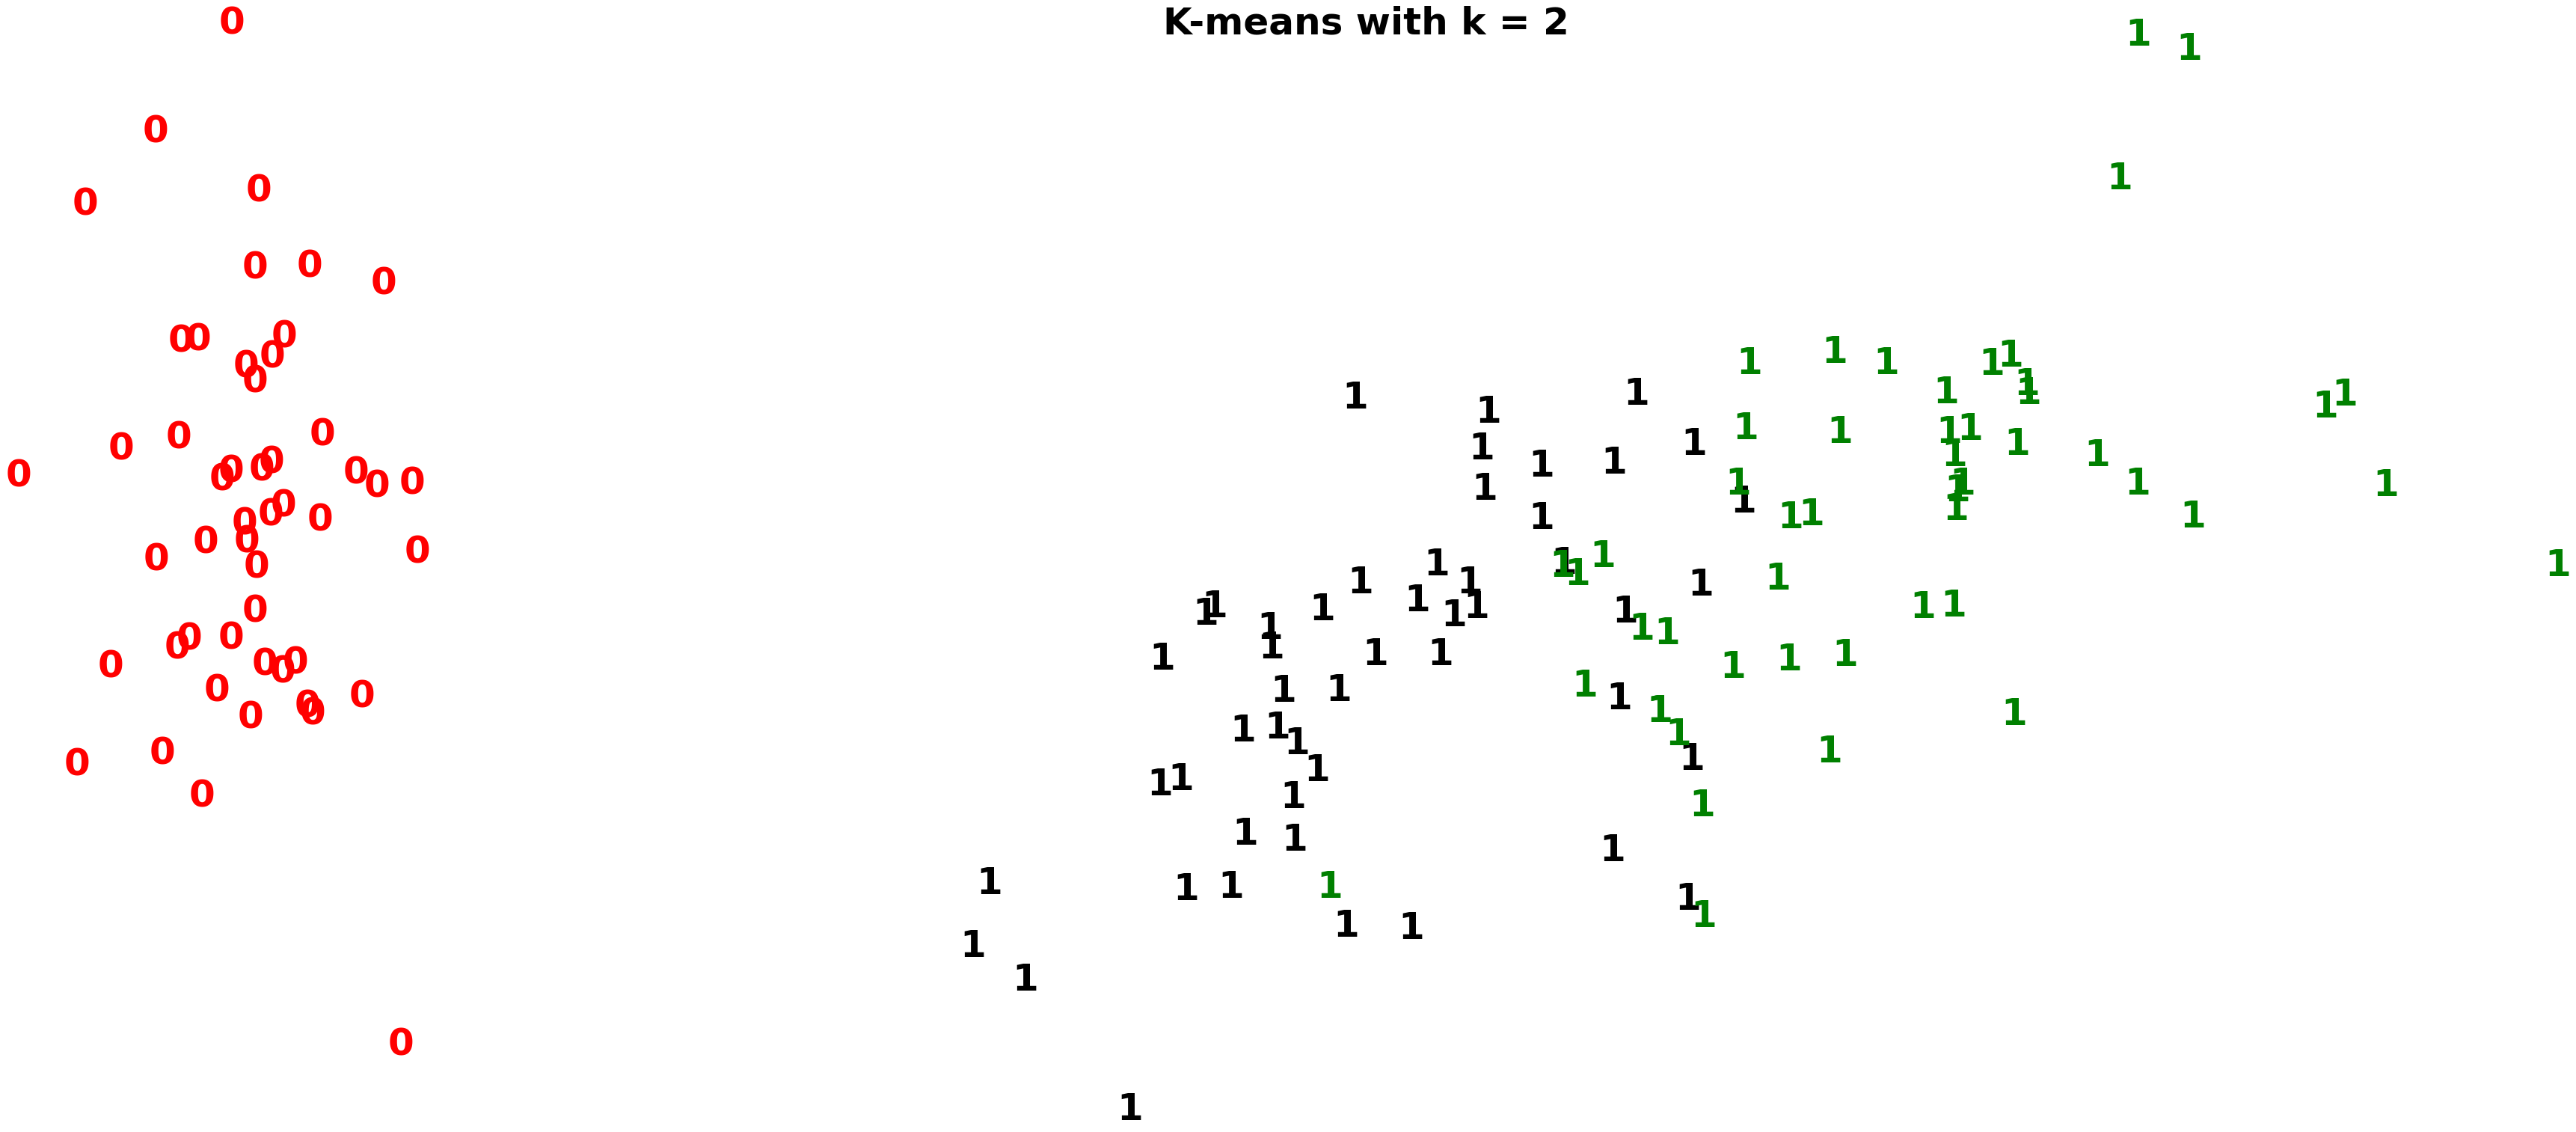

63.7 ms ± 3.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


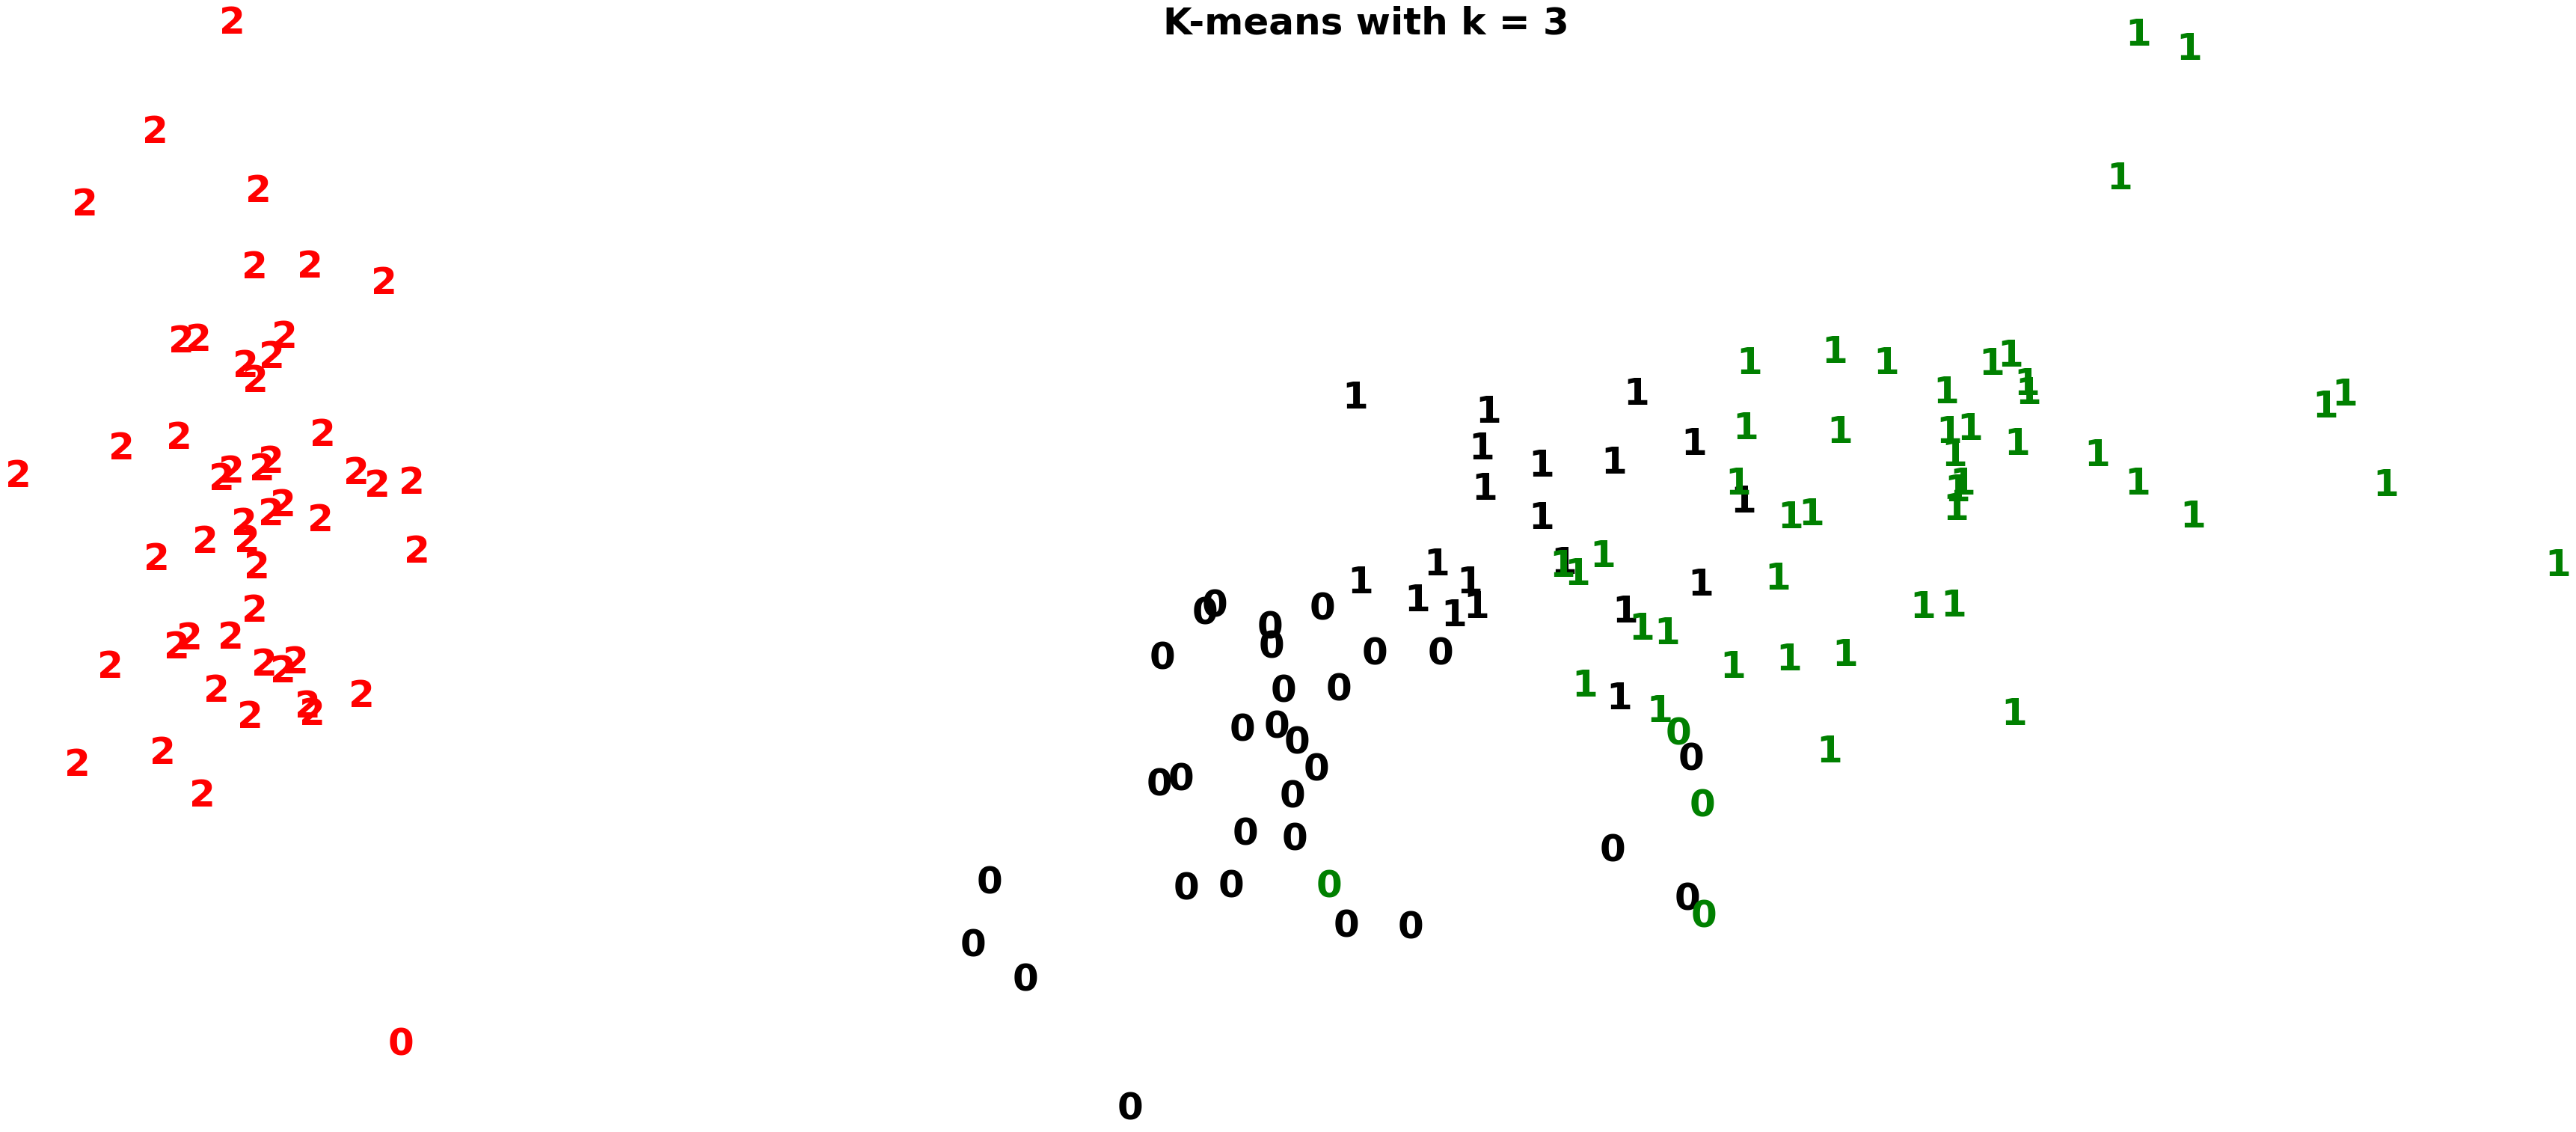

67.6 ms ± 3.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


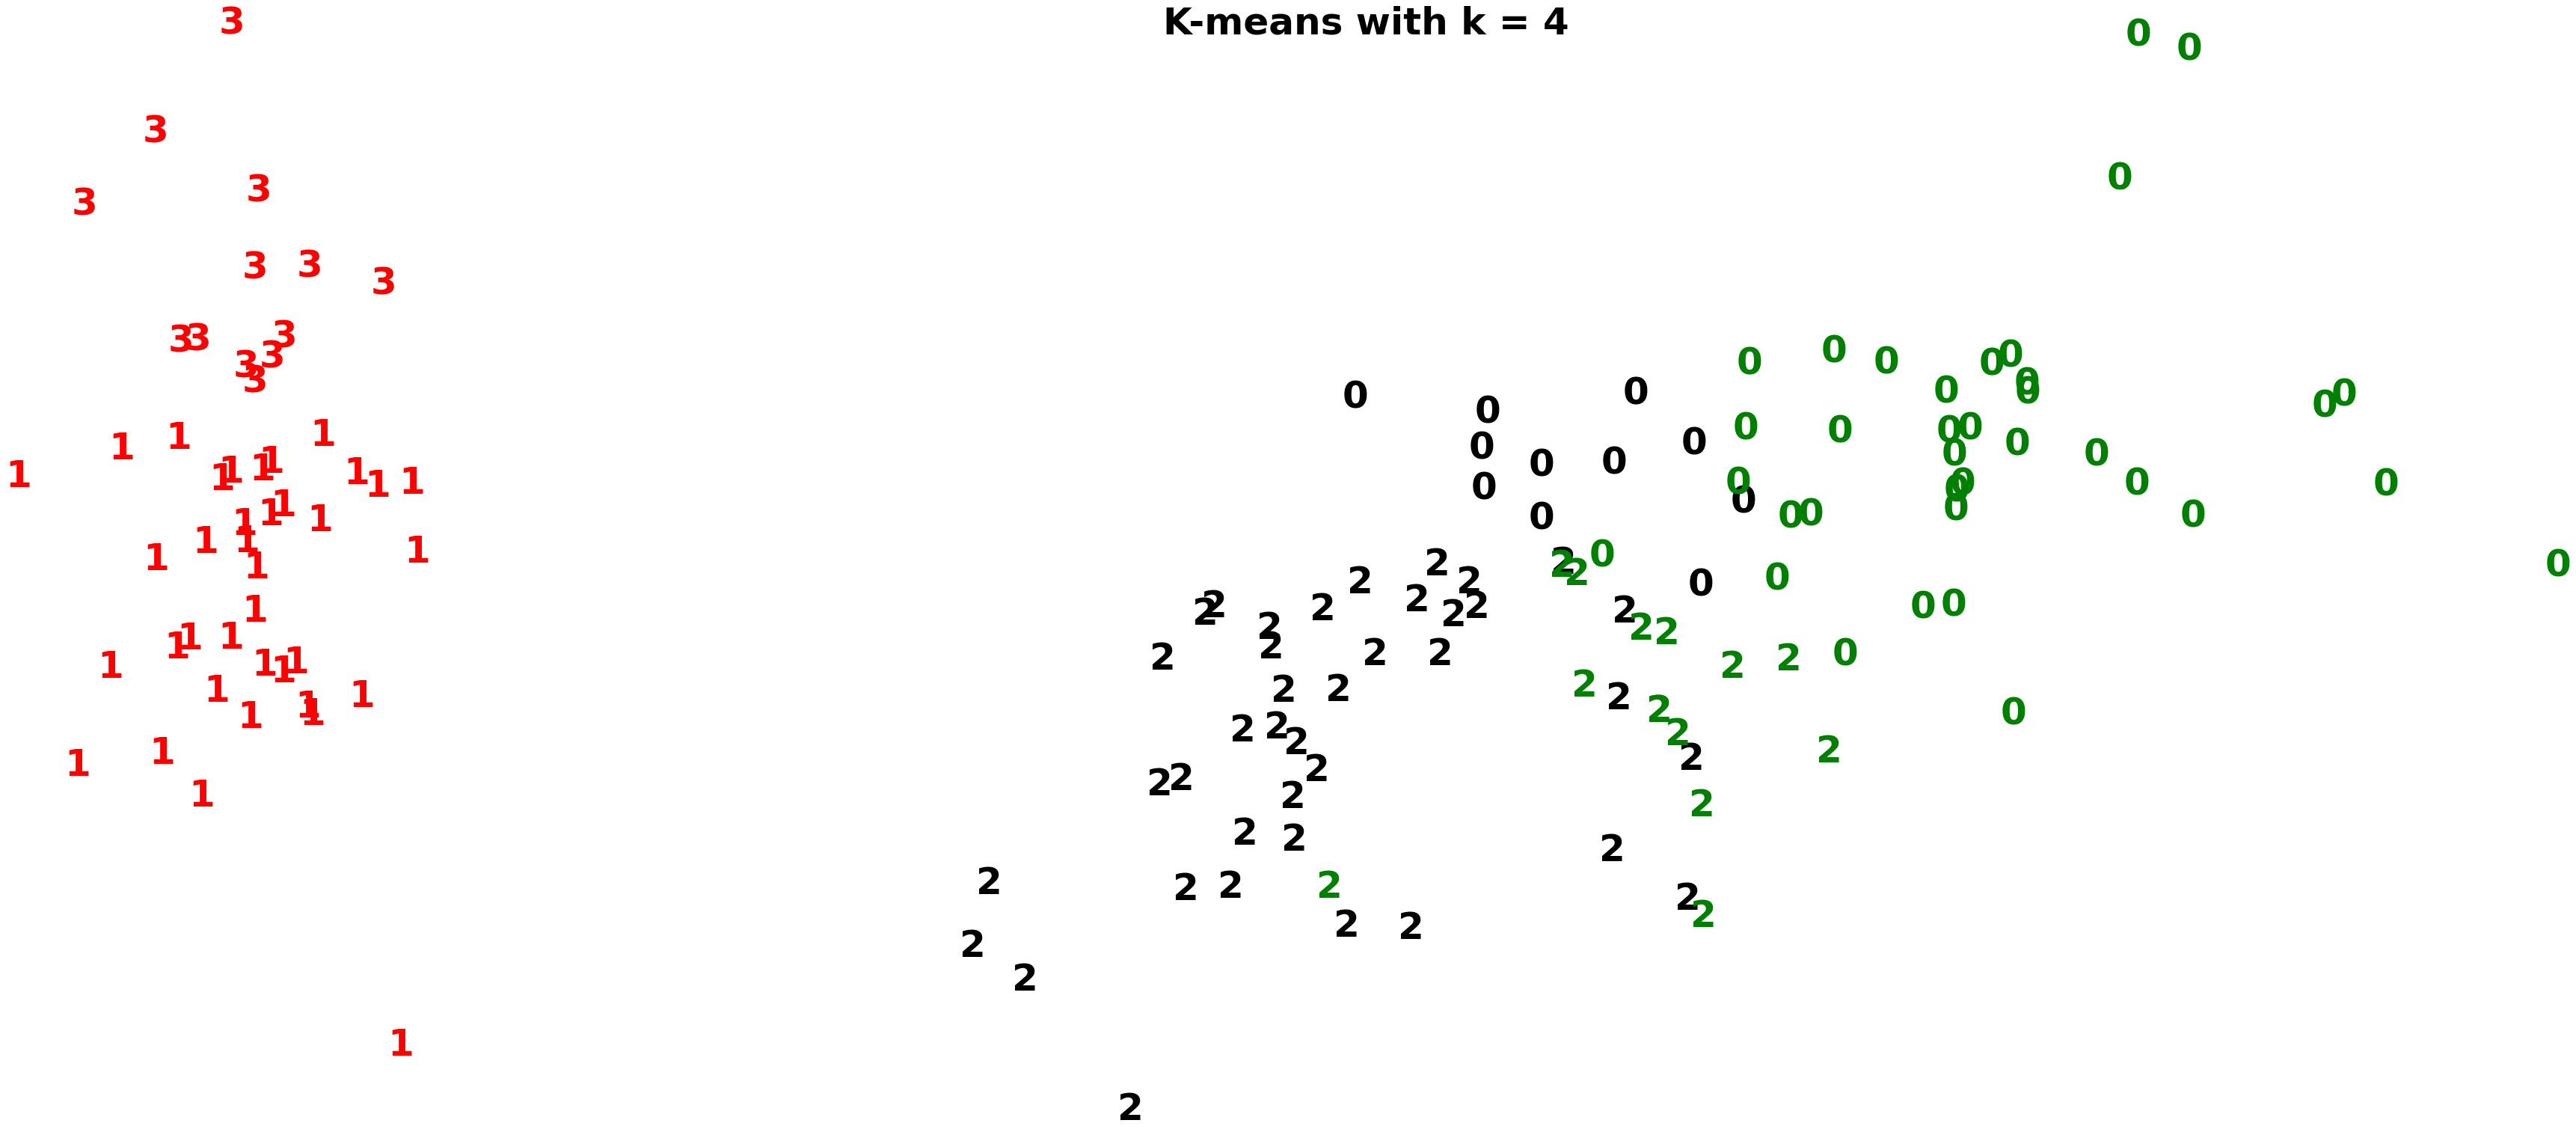

75.2 ms ± 5.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


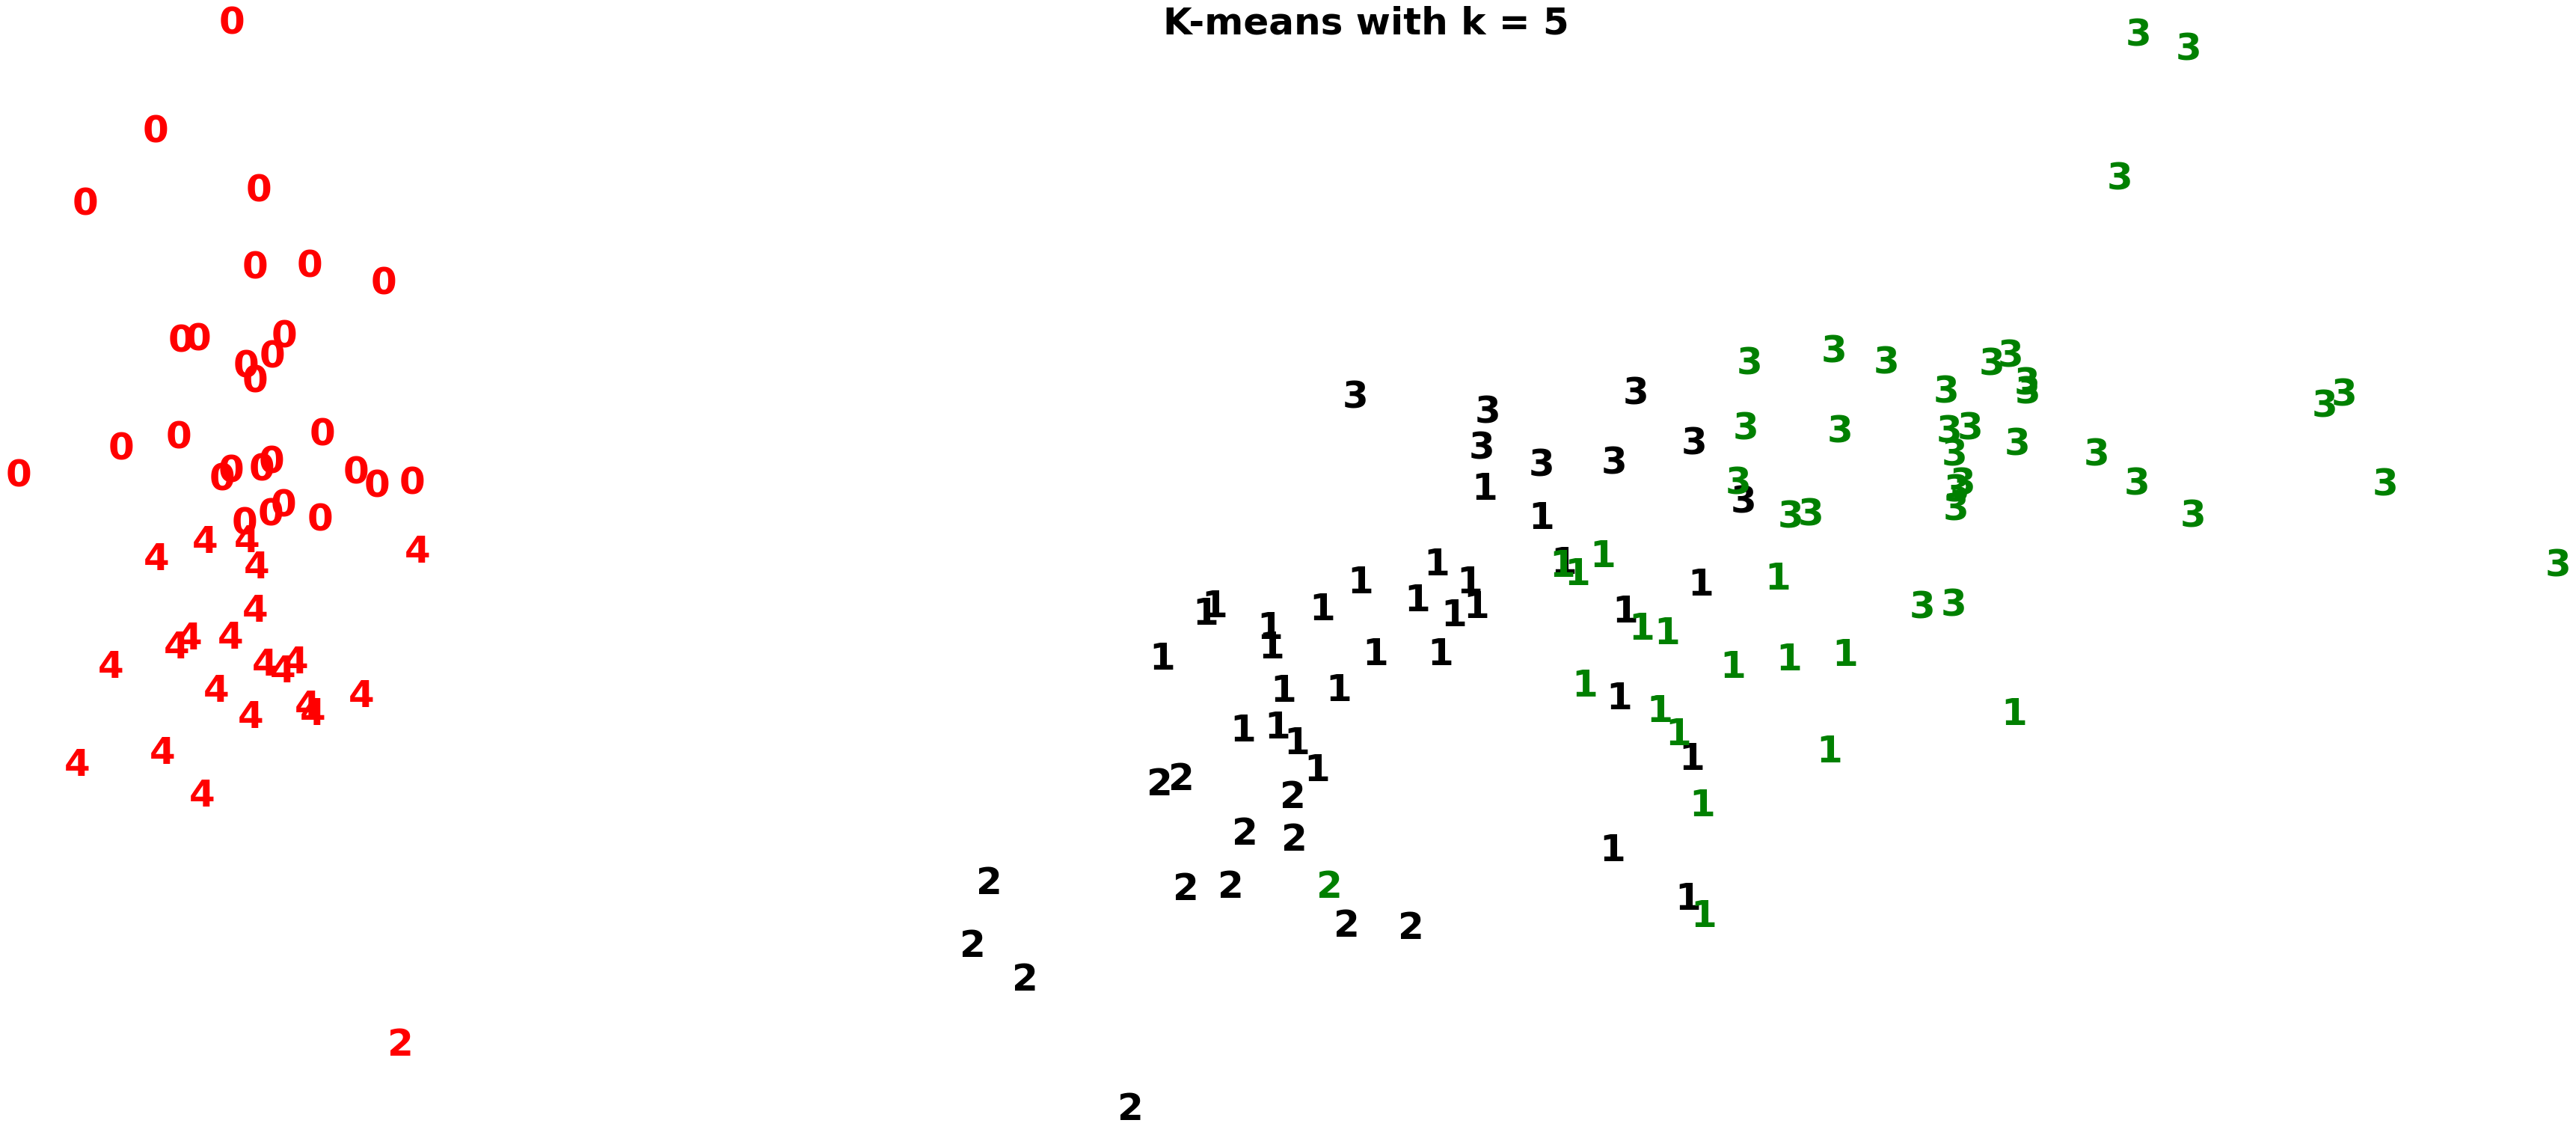

75 ms ± 2.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


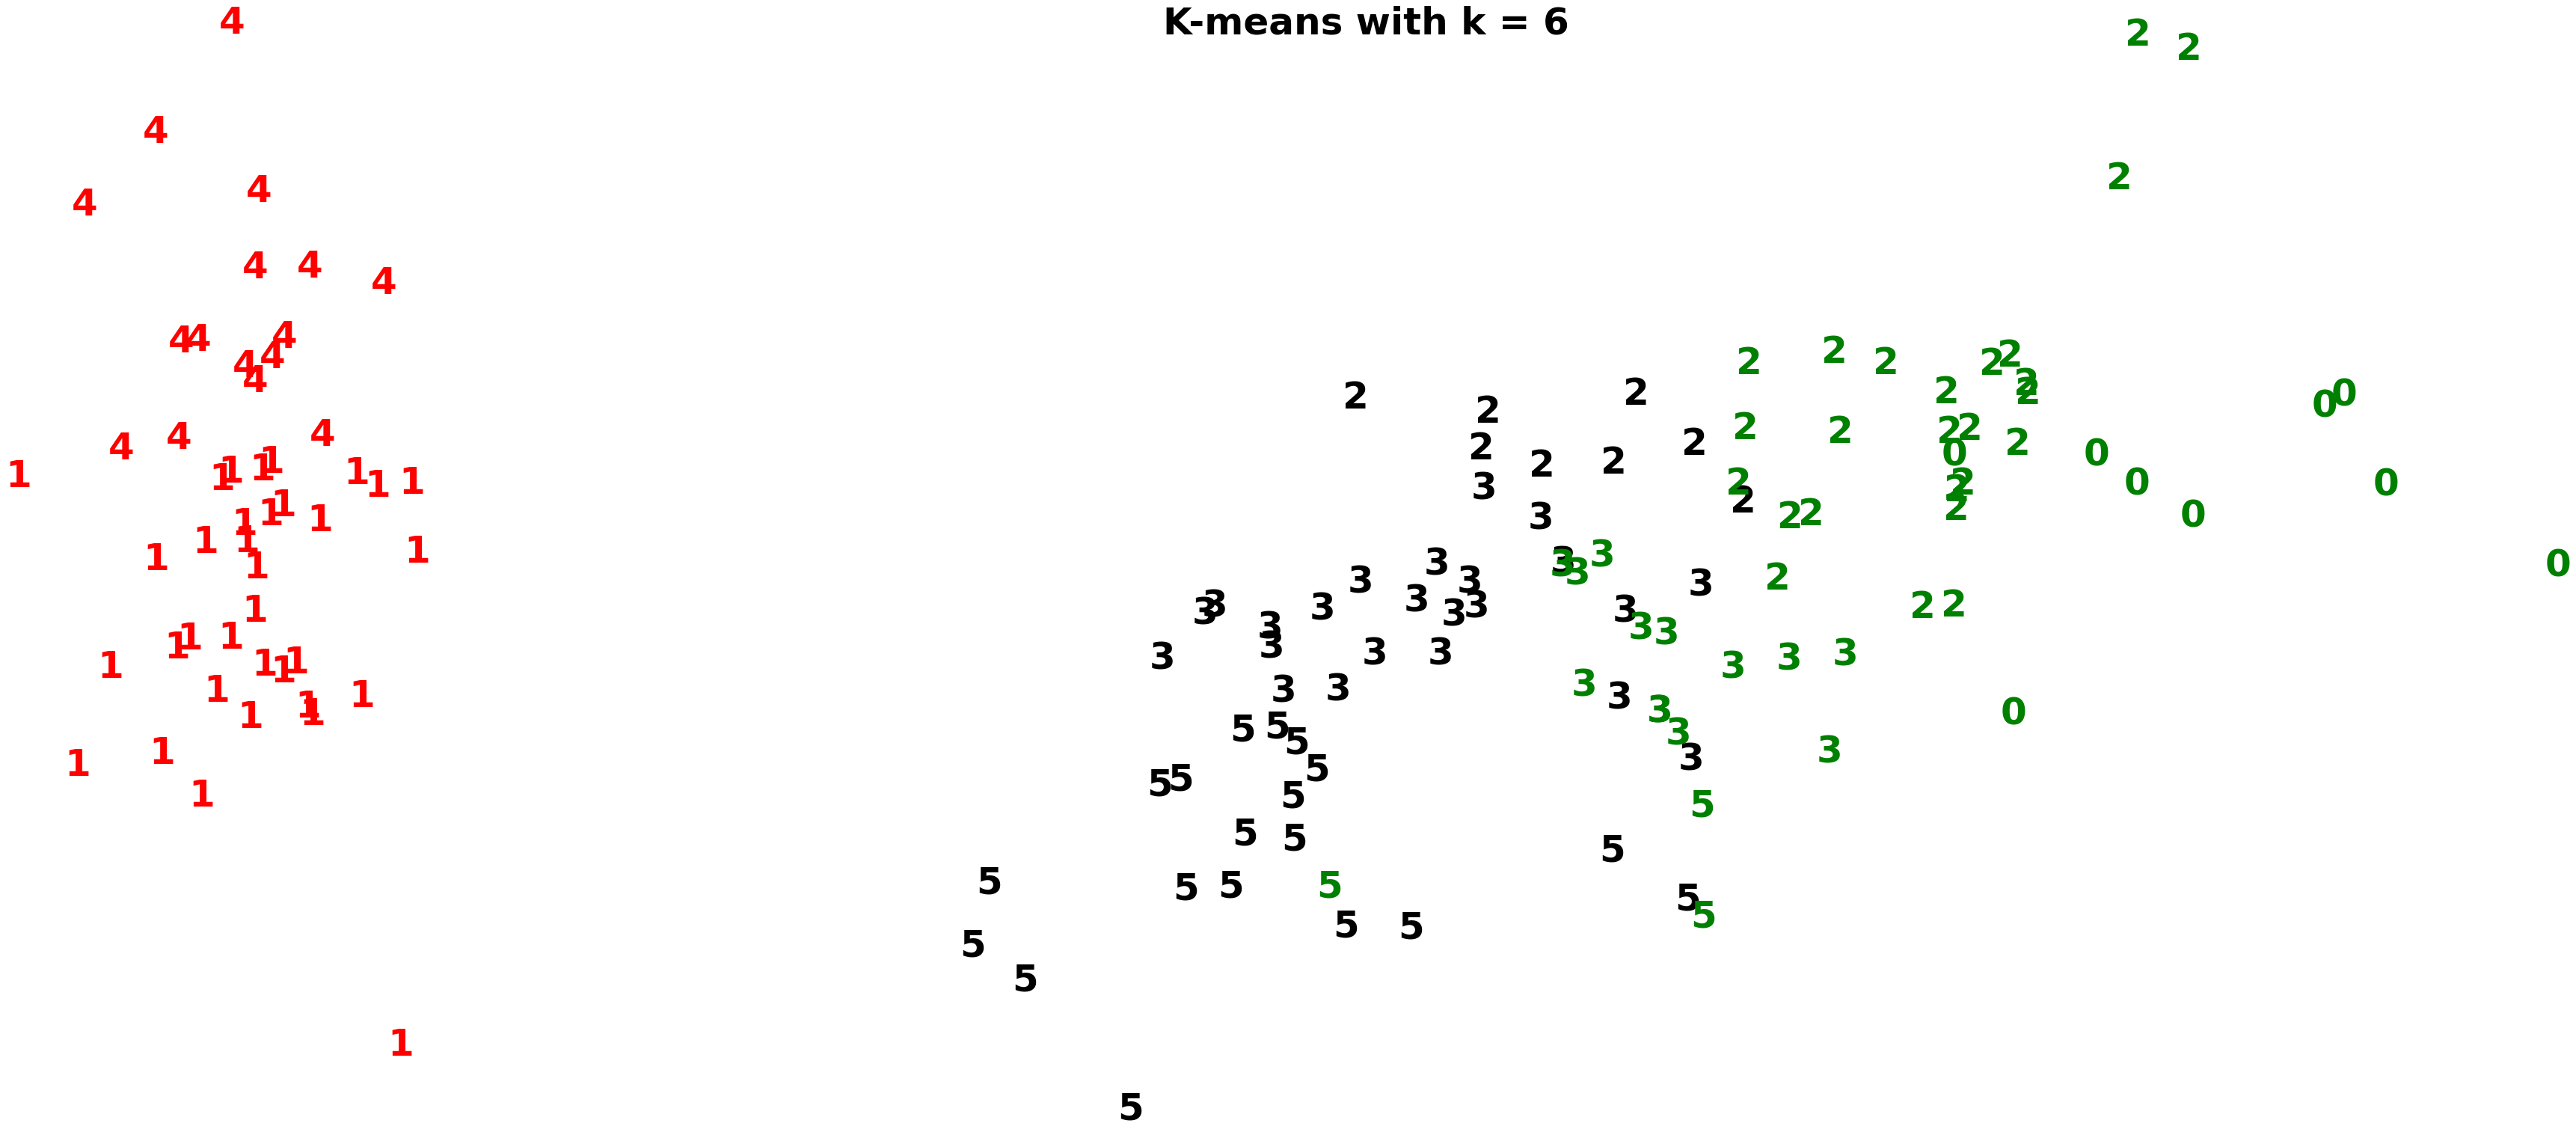

In [ ]:


k_number=[2,3,4,5,6]

for n in k_number:
    minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=n,
    batch_size=50)

# Fit model
    %timeit minikmeans_cluster.fit(X_std)
    minikmeans_cluster = minikmeans_cluster.predict(X_std)
    
    
    plt.figure(figsize=(10,5))
    colours = 'rbg'
    plt.text(text_x,text_y, "K-means with k = {}".format(n),
                            fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
                 color=color[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
        )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    

the best solution k=2, k=3. Out of the 2 k=3 is the best, because it suites better data prerequisites for k-means

Create a k-means solution that correctly assigns patients to heart disease diagnosis or no heart disease diagnosis clusters. Note that in this case, you actually know the correct number of clusters in the data (two). But you'll test whether k-means assigns observations as you expect it to. Because k-means is an unsupervised learning algorithm, it will be blind to whether or not the patients have heart disease.

In [ ]:
from sqlalchemy import create_engine
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'
    


In [ ]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [ ]:
 # Define the features and the outcome
 X = heartdisease_df.iloc[:, :13]
 y = heartdisease_df.iloc[:, 13]

 # Replace missing values (marked by `?`) with a `0`
 X = X.replace(to_replace='?', value=0)

 # Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
 y = np.where(y > 0, 1, 0)

In [ ]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

79.6 ms ± 5.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


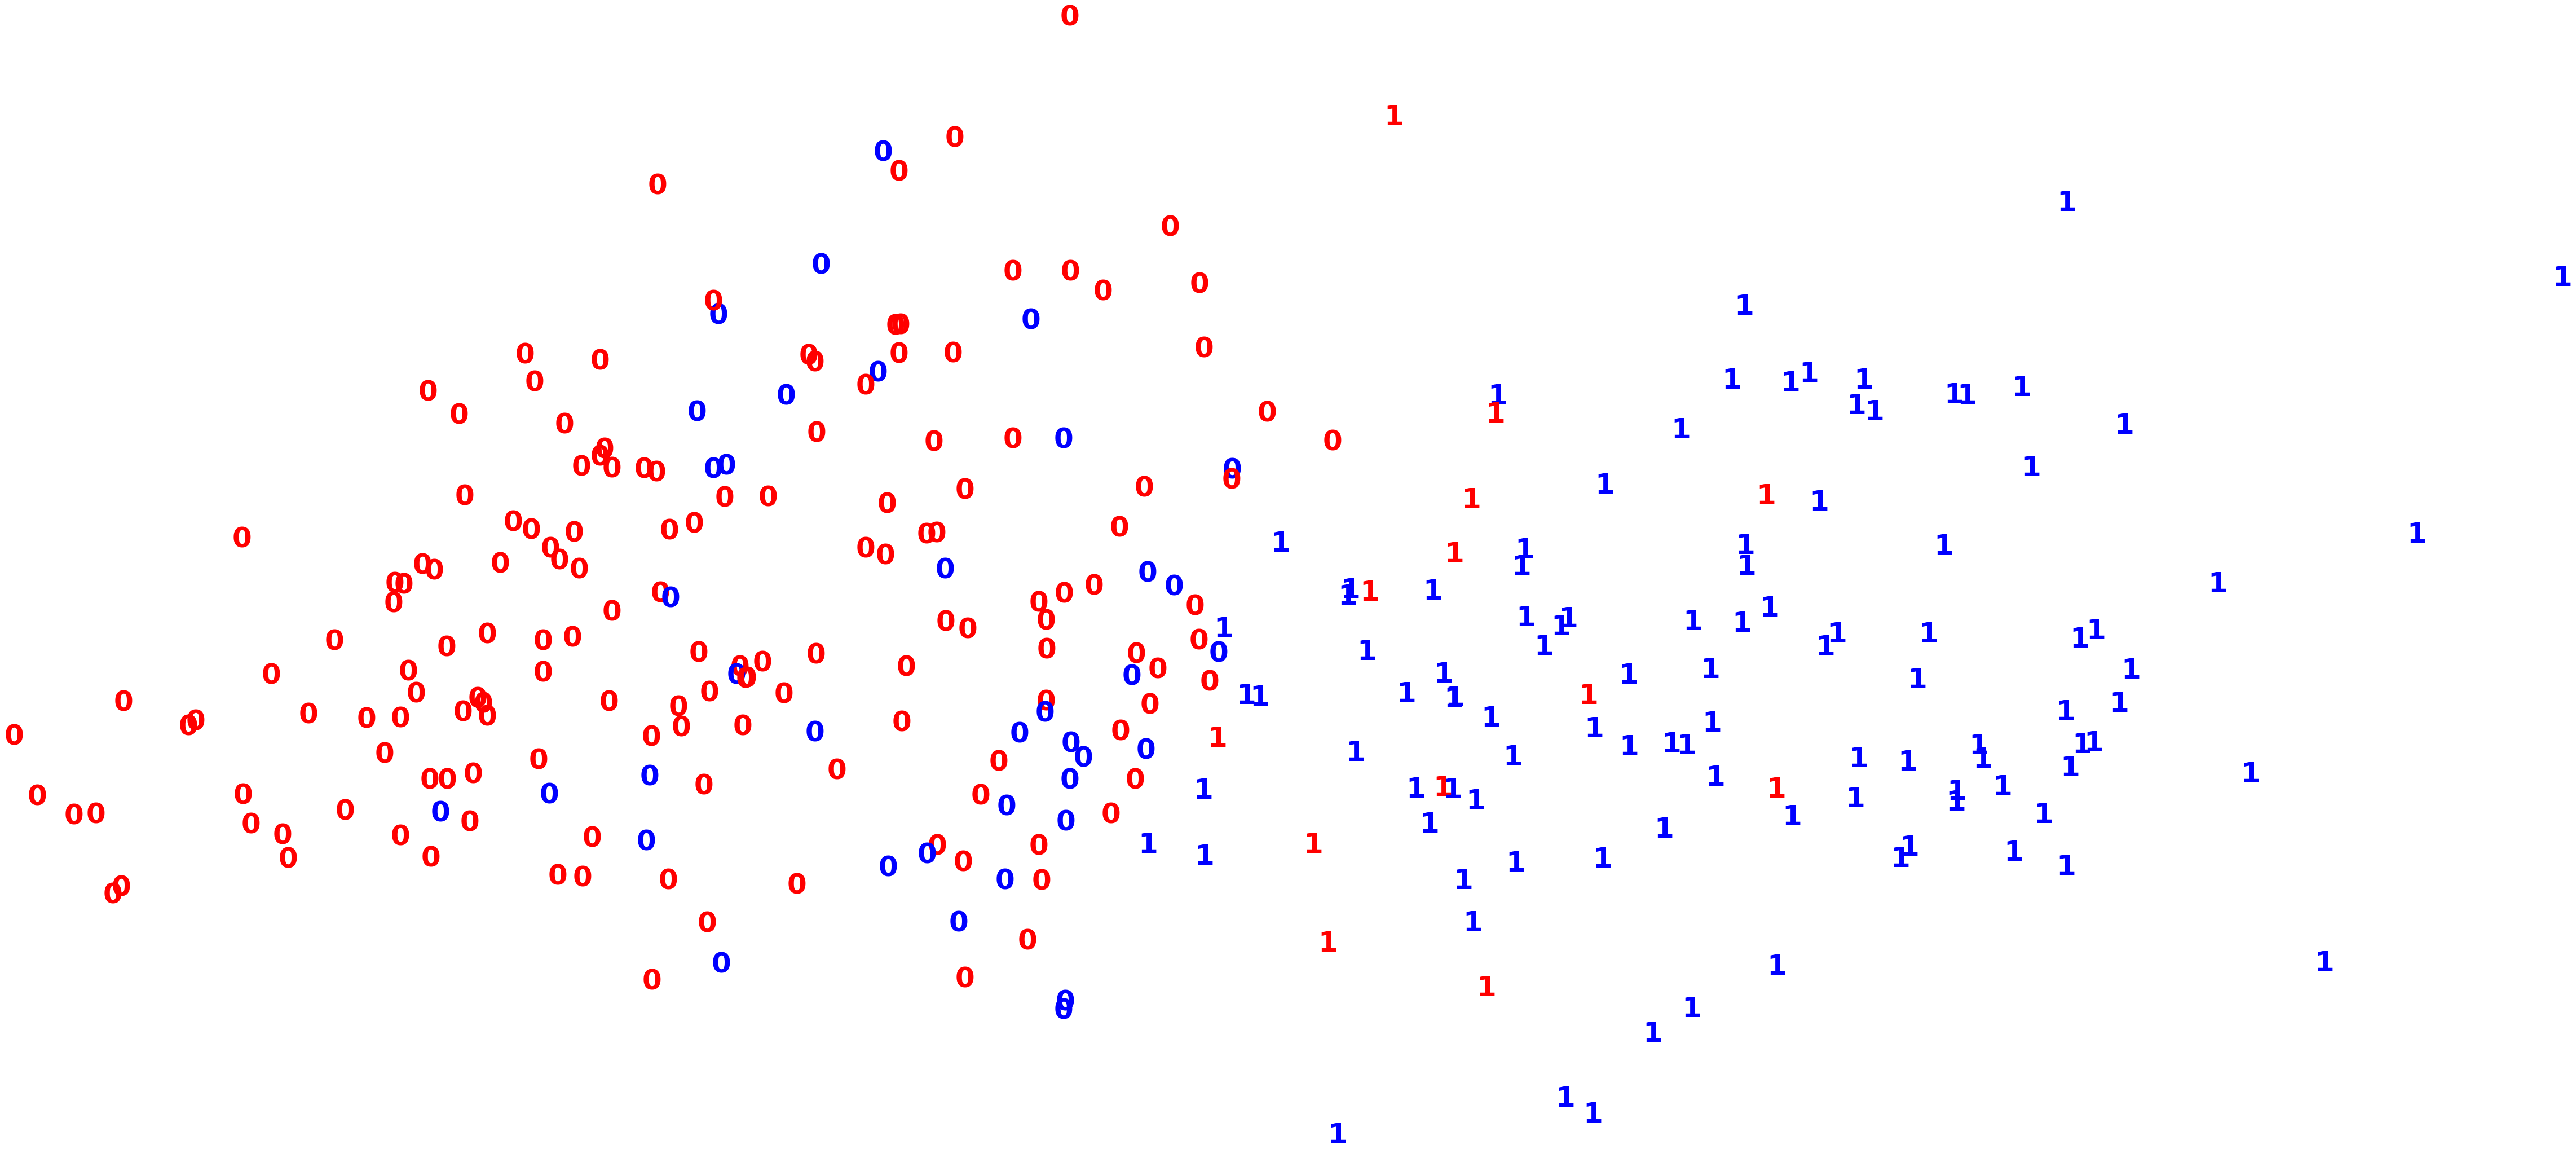

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print(pd.crosstab(y_pred, y))

col_0    0    1
row_0          
0      151   38
1       13  101


252 observations out of 303 were correctly classified